In [1]:
from plot_utils import plot_success_rate_choice_reaction, plot_task_completion_time_choice_reaction, plot_end_point_dist_choice_reaction
from df_utils import create_df, create_sparse_df_choice_reaction
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cmap = plt.get_cmap('plasma') 
all_variants = ["Distance + Bonus + Effort Model", "Bonus", "Distance + Bonus", "Distance"]
values = np.linspace(0, len(all_variants), len(all_variants)) 
colors = {key: cmap(v / 5) for key, v in zip(all_variants, values)}

markers = {"no_bonus": "+", "hit_bonus": "o"}
effort_models = ["zero_effort", "dc_effort_w1", "jac_effort_w1", "ctc_effort_w1", "armmovementpaper_effort"]

In [3]:
#read data
folder = os.path.abspath(f"../../simulators/")
data_df_1, number_of_episodes = create_df(["no_bonus"], ["zero_effort"], ["dist"], folder, run_nr=1, task = "choice_reaction")
data_df_2, number_of_episodes = create_df(["hit_bonus"], effort_models, ["dist"], folder, run_nr=1, task = "choice_reaction")
sparse_data_df = create_sparse_df_choice_reaction(effort_models)

all_combined_df = pd.concat([sparse_data_df, data_df_1, data_df_2])

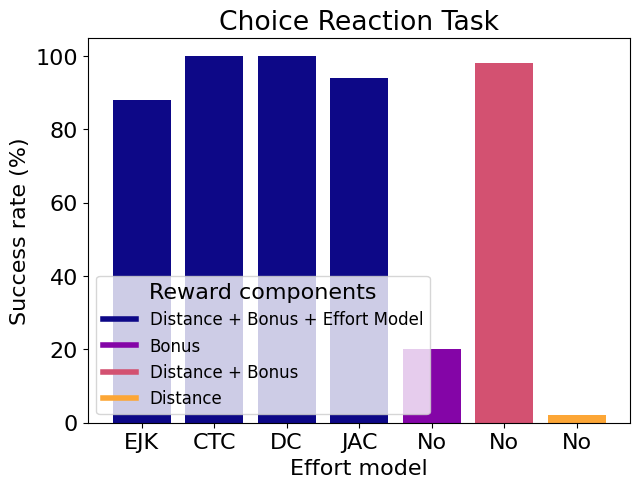

In [4]:
plot_success_rate_choice_reaction(all_combined_df, colors)

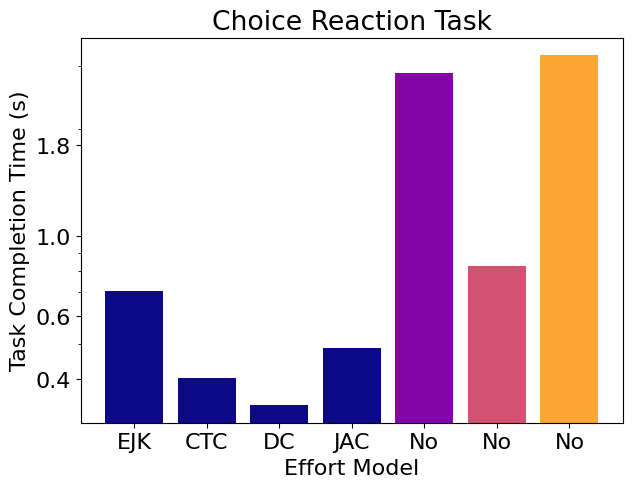

In [5]:
plot_task_completion_time_choice_reaction(all_combined_df, colors)

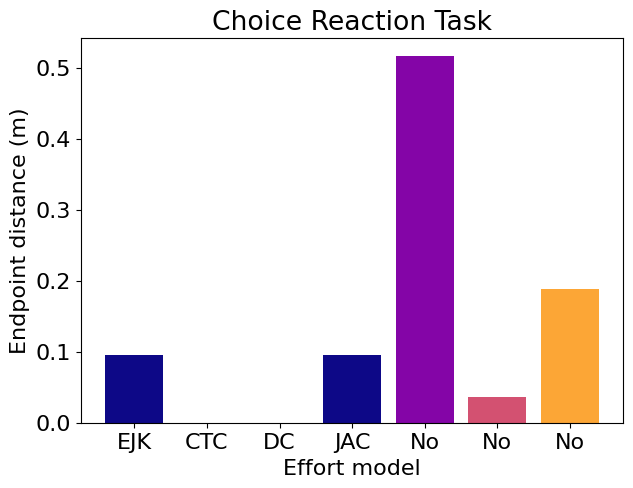

In [6]:
#cumulative distance
plot_end_point_dist_choice_reaction("Choice Reaction", "endpoint_distance_choice_reaction", colors, markers, all_combined_df)